# A3 - Correlation and linear regression
Probability and Statistics <br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)
  

## Introduction

The following problems uses data and idea from **[OpenIntro Statistics](https://www.openintro.org/book/os/)**. The original Notebook **[Introduction to linear regression](https://github.com/akmand/stats_tutorials/blob/main/ch8_simple_regression.ipynb)** explains the background. More detailed explanation of the variables and their analysis can be read from **[Baseball statistics](https://en.wikipedia.org/wiki/Baseball_statistics)** and **[Sabermetrics](https://en.wikipedia.org/wiki/Sabermetrics)**-

This assignment follows the original material's **[Creative Commons Attribution-ShareAlike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/)** license policy. The data file can be found from OMA.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import polyfit, polyval
from scipy.stats import linregress
from scipy.optimize import curve_fit

# Read data
data = pd.read_csv("mlbbat10.csv")

## Problem 1.

Coding:
- Calculate the descriptive statistics for the whole dataset.
- Plot the histograms of the variables `run` and `at_bat`.
- Plot the scatterplot between `run`and `at_bat`. Use `at_bat` as [independent](https://en.wikipedia.org/wiki/Regression_analysis) and `run` as [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables).

Questions:

a) Describe in your own words the statistics for **<a href="https://en.wikipedia.org/wiki/Run_(baseball)">run</a>** and **[at_bat](https://en.wikipedia.org/wiki/At_bat)** variables.<br>
b) Describe *by words* (interpret the scatterplot) how does the relationship between `at_bat` and `run` look like.<br>
c) If you knew in advance a player's time `at_bat`, would you be comfortable to predict the `run` score? Explain why.

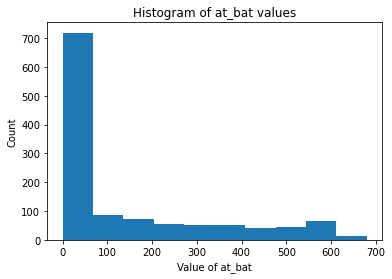

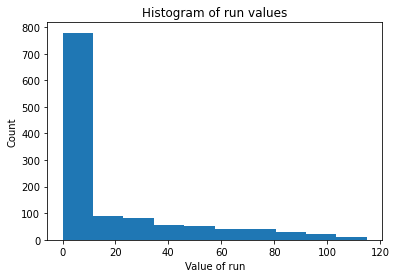

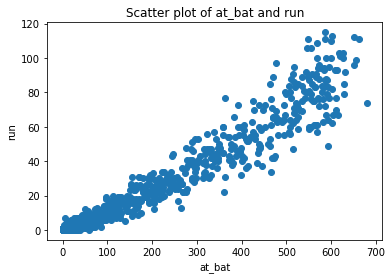

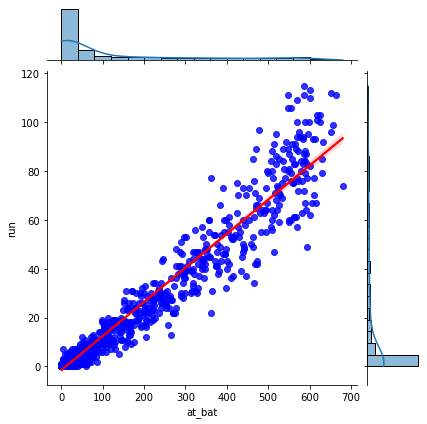

In [2]:
# a
data.describe()
run = data['run']
at_bat = data['at_bat']

# b
plt.hist(at_bat, bins = 10)
plt.xlabel('Value of at_bat')
plt.ylabel('Count')
plt.title('Histogram of at_bat values')
plt.show()

plt.hist(run, bins = 10)
plt.xlabel('Value of run')
plt.ylabel('Count')
plt.title('Histogram of run values')
plt.show()

# c
plt.scatter(at_bat, run)
plt.xlabel('at_bat')
plt.ylabel('run')
plt.title('Scatter plot of at_bat and run')
plt.show()

sns.jointplot(data = data, x = 'at_bat', y = 'run', kind = 'reg', scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})

**Answers:**

a) Describe in your own words the statistics for run and at_bat variables. <br>
Most common 'run' variable is in the mode 0-10 with the range of 0-115. In terms of 'at_bat', the mode is 0-40 and range is 0-680. <br>
<br> 
b) Describe by words (interpret the scatterplot) how does the relationship between at_bat and run look like. <br>
The relation between at_bat and run is linear. <br>
<br>
c) If you knew in advance a player's time at_bat, would you be comfortable to predict the run score? Explain why. <br>
The lower the value the at_bat is, the closer the prediction is to run, but as the correlation is linear, the prediction works for the whole range, difference is the precision. <br>
<br>

## Problem 2.

Coding: <br>
a) Calculate the correlation coefficient between the `run` and `at_bat`. <br>
b) Using any method, like `numpy.polyfit()` or `scipy.stats.linregress()`, find the best regression line that fits to the data. <br>
c) Plot the scatterplot between variables `at_bat` and `run`. <br>
d) Add the best fitting regression line to the graph. <br>
e) Add the results of the correlation calculation either into the title of the graph or legend box. <br>
f) Decorate the graph with suitable labels, grid-lines. <br>
g) Use different colors for the scatter-plot and the regression line. <br>

Questions:

a) How the `at_bat` and `run` are correlated? Interpret the results of correlation calculations.<br>
b) If the player is `at_bat` 400 times in a year, what is his `run` score?<br>
c) How certain you would be about that score? Explain why.<br>

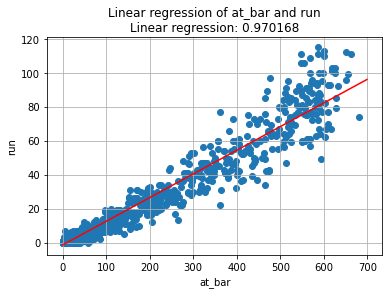

In [3]:
# a 
corr_at_bat_run = data[['at_bat', 'run']].corr()

# b
p = polyfit(at_bat, run, 1)
x1 = np.arange(0, 700)
y1 = p[0] * x1 + p[1]

# c, d, g
plt.scatter(at_bat, run)
plt.plot(x1, y1, 'r')

# e, f
plt.xlabel("at_bar")
plt.ylabel("run")
plt.title(f"Linear regression of at_bar and run\nLinear regression: 0.970168")
plt.grid()
plt.show()


**Answers:**

a) How the at_bat and run are correlated? Interpret the results of correlation calculations. <br>
The correlation is linear. The correlation value is high and close to 1.<br>
<br>
b) If the player is at_bat 400 times in a year, what is his run score? <br>
Approximately 56.<br>
<br>
c) How certain you would be about that score? Explain why. <br>
Not as certain as if the at_bar value would be less than <400, but still the prediction is quite close to the actual outcome.<br>
<br>

## Problem 3.

Study the other variables in the dataset. Find the variable that could best predict the `run` score. Explain which one of the variables you would select and why.

In [4]:
print(f"Correlation between at_bat and run: \n{data[['at_bat', 'run']].corr()} \n")

print(f"Correlation between game and run: \n{data[['game', 'run']].corr()} \n")

print(f"Correlation between hit and run: \n{data[['hit', 'run']].corr()} \n")

print(f"Correlation between double and run: \n{data[['double', 'run']].corr()} \n")

print(f"Correlation between triple and run: \n{data[['triple', 'run']].corr()} \n")

print(f"Correlation between home_run and run: \n{data[['home_run', 'run']].corr()} \n")

print(f"Correlation between rbi and run: \n{data[['rbi', 'run']].corr()} \n")

print(f"Correlation between total_base and run: \n{data[['total_base', 'run']].corr()} \n")

print(f"Correlation between walk and run: \n{data[['walk', 'run']].corr()} \n")

print(f"Correlation between strike_out and run: \n{data[['strike_out', 'run']].corr()} \n")

print(f"Correlation between stolen_base and run: \n{data[['stolen_base', 'run']].corr()} \n")

print(f"Correlation between caught_stealing and run: \n{data[['caught_stealing', 'run']].corr()} \n")

print(f"Correlation between obp and run: \n{data[['obp', 'run']].corr()} \n")

print(f"Correlation between slg and run: \n{data[['slg', 'run']].corr()} \n")

print(f"Correlation between bat_avg and run: \n{data[['bat_avg', 'run']].corr()} \n")

Correlation between at_bat and run: 
          at_bat       run
at_bat  1.000000  0.970168
run     0.970168  1.000000 

Correlation between game and run: 
          game       run
game  1.000000  0.903774
run   0.903774  1.000000 

Correlation between hit and run: 
          hit       run
hit  1.000000  0.977381
run  0.977381  1.000000 

Correlation between double and run: 
          double       run
double  1.000000  0.949386
run     0.949386  1.000000 

Correlation between triple and run: 
          triple       run
triple  1.000000  0.684214
run     0.684214  1.000000 

Correlation between home_run and run: 
          home_run       run
home_run  1.000000  0.859812
run       0.859812  1.000000 

Correlation between rbi and run: 
          rbi       run
rbi  1.000000  0.945531
run  0.945531  1.000000 

Correlation between total_base and run: 
            total_base       run
total_base    1.000000  0.981973
run           0.981973  1.000000 

Correlation between walk and run: 
       

**Answer:** <br>
Total base gives the best prediction with run, those two variables has to highest correlation value. 